# **Predicción de enfermedades del corazón**

## **1|Introducción**

Según estudios realizados por los Centros para el Control y Prevención de Enfermedades (CDC) una de las principales causas de muerte en las personas en los EE.UU es debido a enfermedades cardíacas. Alrededor del 47% de los estadounidenses tienen al menos 1 de cada 3 factores de riesgo clave de las enfermedades cardíacas como lo son: la presión arterial alta, colesterol alto, tabaquismo, estado diabético, obesidad(IMC alto), la no realización de la actividad física o el alcoholismo. 
La detección y prevención de estos factores en una etapa temprana pueden salvar inmumerables vidas. Es por ellos, que la aplicación de métodos de aprendizaje automático para detectar estos patrones en base a los datos pueden incidir positivamente en la salud de la población.

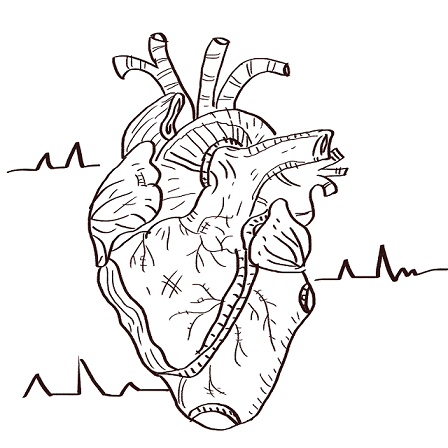


### Indicadores clave personales de enfermedad cardíaca


El conjunto de datos proviene de los CDC y es una parte importante del Sistema de Vigilancia de Factores de Riesgo del Comportamiento (BRFSS), que realiza encuestas telefónicas anuales para recopilar datos sobre el estado de salud de los residentes de EE. UU. Como describe el CDC: "Establecido en 1984 con 15 estados, BRFSS ahora recopila datos en los 50 estados, así como en el Distrito de Columbia y tres territorios de EE. UU. sistema de encuestas en el mundo". El conjunto de datos más reciente (al 15 de febrero de 2022) incluye datos de 2020. 
Los datos con los que trabajaremos provienen de la encuesta anual de los CDC de 2020 de 400 000 adultos relacionados con su estado de salud.

### Descripción de columnas: 



* HeartDisease: Encuestados que alguna vez informaron tener enfermedad coronaria (CHD) o infarto de miocardio (MI).
* BMI: Índice de masa corporal (IMC).
* Smoking: ¿Ha fumado al menos 100 cigarrillos en toda su vida? [Nota: 5 paquetes = 100 cigarrillos].
* AlcoholDrinking: Bebedores empedernidos (hombres adultos que beben más de 14 tragos por semana y mujeres adultas que beben más de 7 tragos por semana).
* Stroke: (Alguna vez le dijeron) (usted tuvo) un derrame cerebral?.
* PhysicalHealth: Ahora, pensando en su salud física, que incluye enfermedades y lesiones físicas, ¿durante cuántos días durante los últimos 30 días su salud física no fue buena? (0-30 días)
* MentalHealth: Pensando en su salud mental, ¿durante cuántos días durante los últimos 30 días su salud mental no fue buena? (0-30 días).
* DiffWalking: ¿Tiene serias dificultades para caminar o subir escaleras?
* Sex: ¿Es usted hombre o mujer?
* AgeCategory: Categoría de edad de catorce niveles.
* Race: Valor de raza/origen étnico imputado.
* Diabetic: (Alguna vez le dijeron) (usted tenía) diabetes?
* PhysicalActivity: Adultos que informaron haber realizado actividad física o ejercicio durante los últimos 30 días además de su trabajo habitual.
* GenHealth: Diría usted que en general su salud es...  
* SleepTime: En promedio, ¿cuántas horas duerme en un período de 24 horas?
* Asthma: (Alguna vez le dijeron) (usted tenía) asma?
* KidneyDisease: Sin incluir cálculos renales, infección de la vejiga o incontinencia, ¿alguna vez le dijeron que tenía una enfermedad renal?
* SkinCancer: ¿Alguna vez le dijeron que tenía cáncer de piel?



## Objetivos

El objetivo de esta investigación es poder predecir la probabilidad de que una determinada persona tenga una enfermedad cardiaca o no, dependiendo de distintos factores tales como:  la edad, el promedio de horas de descanso, la obesidad (IMC), si es fumador o no, si bebe alcohol, entre otras. 

## Integrantes
El equipo de trabajo está conformado por:  

*   Balbiani, Nicolás
*   Herrera, Nicolás
*   Vittola, Matías


 


## **2 | Importación librerías**

Importamos las librerías básicas

In [1]:
import os
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

Importamos las librerías para visualizacion de datos

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## **3 | Lectura del dataset**

Cargamos el conjunto de datos

In [4]:
df_heart = pd.read_csv('/content/sample_data/heart_2020_cleaned.csv')
df_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Tipos de variables del data set 

Variables categóricas 

HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer

Variables numéricas 

BMI, PhysicalHealtH, MentalHealth, AgeCategory, SleepTime



In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146482 entries, 0 to 146481
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      146482 non-null  object 
 1   BMI               146482 non-null  float64
 2   Smoking           146482 non-null  object 
 3   AlcoholDrinking   146482 non-null  object 
 4   Stroke            146482 non-null  object 
 5   PhysicalHealth    146482 non-null  float64
 6   MentalHealth      146482 non-null  float64
 7   DiffWalking       146482 non-null  object 
 8   Sex               146482 non-null  object 
 9   AgeCategory       146482 non-null  object 
 10  Race              146482 non-null  object 
 11  Diabetic          146482 non-null  object 
 12  PhysicalActivity  146482 non-null  object 
 13  GenHealth         146481 non-null  object 
 14  SleepTime         146481 non-null  float64
 15  Asthma            146481 non-null  object 
 16  KidneyDisease     14

In [6]:
df_heart.nunique()

HeartDisease           2
BMI                 3037
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             23
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

##Análisis variables numéricas

In [7]:
df_heart.describe().T.style.set_properties(**{'background-color': '#eb2a37','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,146482.000000,28.243109,6.351545,12.020000,23.880000,27.260000,31.320000,94.850000
PhysicalHealth,146482.000000,3.350808,7.902670,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,146482.000000,3.908453,7.928353,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,146481.000000,7.102935,1.451533,1.000000,6.000000,7.000000,8.000000,24.000000


##Análisis variables categóricas

In [8]:
fig = make_subplots(
    rows=7, cols=2, subplot_titles=("Enfermedad del corazón", "Fumador",
                                    "Bebe alcohol","Derrame cerebral",
                                    "Dificultad para caminar", "Sexo",
                                    'Raza', 'Diabético',
                                    'Acividad Física','Salud general',
                                    'Asma', 'Enfermedad en el riñon',
                                    'Tuvo Cáncer?'),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

colours = ['#53eb38', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(df_heart['HeartDisease'].value_counts().index),
                     values=[x for x in df_heart['HeartDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df_heart['Smoking'].value_counts().index),
                     values=[x for x in df_heart['Smoking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df_heart['AlcoholDrinking'].value_counts().index),
                     values=[x for x in df_heart['AlcoholDrinking'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(df_heart['Stroke'].value_counts().index),
                     values=[x for x in df_heart['Stroke'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(df_heart['DiffWalking'].value_counts().index),
                     values=[x for x in df_heart['DiffWalking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(df_heart['Sex'].value_counts().index),
                     values=[x for x in df_heart['Sex'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(df_heart['Race'].value_counts().index),
                     values=[x for x in df_heart['Race'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(df_heart['PhysicalActivity'].value_counts().index),
                     values=[x for x in df_heart['PhysicalActivity'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=4, col=2)

fig.add_trace(go.Pie(labels=np.array(df_heart['Diabetic'].value_counts().index),
                     values=[x for x in df_heart['Diabetic'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=5, col=1)

fig.add_trace(go.Pie(labels=np.array(df_heart['GenHealth'].value_counts().index),
                     values=[x for x in df_heart['GenHealth'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=5, col=2)

fig.add_trace(go.Pie(labels=np.array(df_heart['Asthma'].value_counts().index),
                     values=[x for x in df_heart['Asthma'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=1)

fig.add_trace(go.Pie(labels=np.array(df_heart['KidneyDisease'].value_counts().index),
                     values=[x for x in df_heart['KidneyDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=2)

fig.add_trace(go.Pie(labels=np.array(df_heart['SkinCancer'].value_counts().index),
                     values=[x for x in df_heart['SkinCancer'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=7, col=1)


fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

fig.show()

## **4 | Data Wrangling**

Convertimos los datos del campo AgeCategory en valores del tipo float calculando la edad media de cada intervalo de esta manera pasa de ser una variable de tipo categorica a tener caracteristicas númericas.

In [9]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27,'nan':0}

df_heart['AgeCategory'] = df_heart['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df_heart['AgeCategory'] = df_heart['AgeCategory'].astype('float')

##**5 | Análisis Exploratorio**

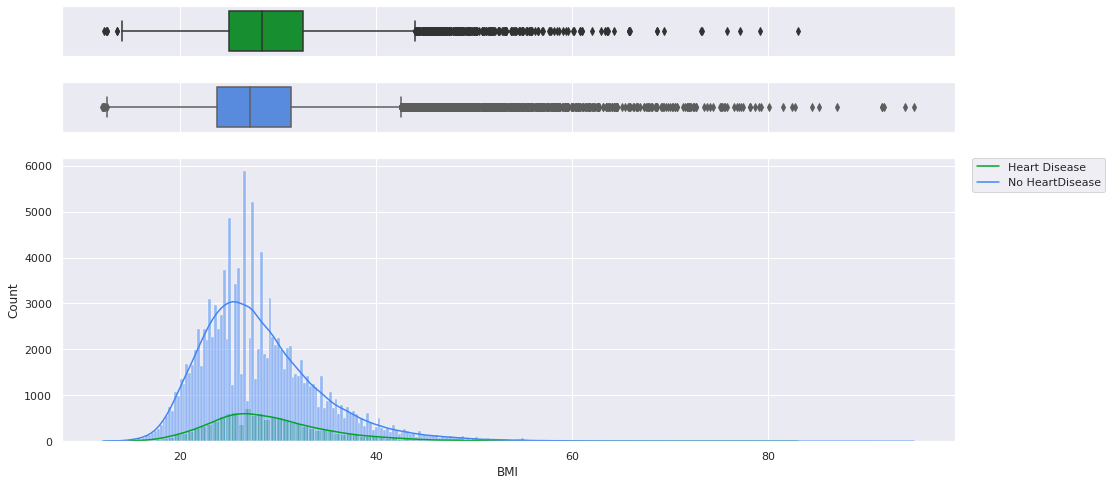

In [10]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#03a326', '#fbbc05', '#34a853']

sns.boxplot(x=df_heart[df_heart['HeartDisease']=='Yes']["BMI"], ax=ax_box1, color="#03a326")
sns.histplot(df_heart[df_heart['HeartDisease']=='Yes'], x="BMI", ax=ax_hist, kde=True, color="#03a326")

sns.boxplot(x=df_heart[df_heart['HeartDisease']=='No']["BMI"], ax=ax_box2, color='#4285f4')
sns.histplot(df_heart[df_heart['HeartDisease']=='No'], x="BMI", ax=ax_hist, kde=True, color='#4285f4')
 

ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

Observación:
Las personas con enfermedades del corazón tienen un IMC más alto que las personas sin enfermedades del corazón.

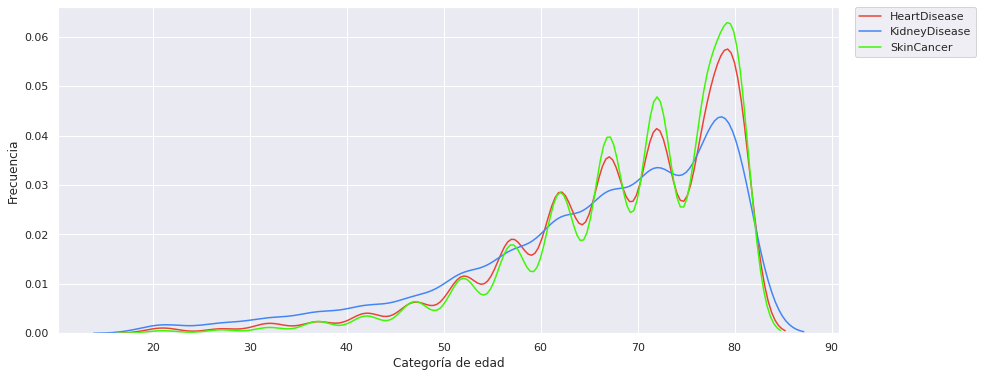

In [11]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(df_heart[df_heart["HeartDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#ea4335", label="HeartDisease", ax = ax)
sns.kdeplot(df_heart[df_heart["KidneyDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#4285f4", label="KidneyDisease", ax = ax)
sns.kdeplot(df_heart[df_heart["SkinCancer"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#3ef705", label="SkinCancer", ax = ax)

ax.set_xlabel("Categoría de edad")
ax.set_ylabel("Frecuencia")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

Observación: Las personas con enfermedades cardíacas, cáncer de piel y enfermedades renales son en su mayoría personas con una mayor edad.

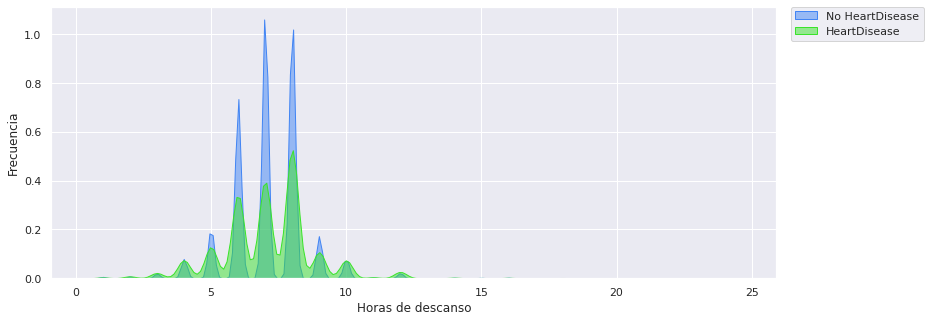

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df_heart[df_heart["HeartDisease"]=='No']["SleepTime"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df_heart[df_heart["HeartDisease"]=='Yes']["SleepTime"], alpha=0.5,shade = True, color="#3ae32b", label="HeartDisease", ax = ax)
ax.set_xlabel("Horas de descanso")
ax.set_ylabel("Frecuencia")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

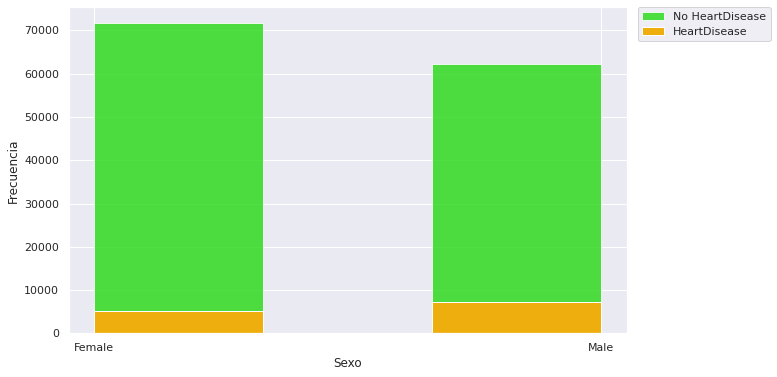

In [12]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df_heart[df_heart["HeartDisease"]=='No']["Sex"], bins=3, alpha=0.8, color="#24d914", label="No HeartDisease")
ax.hist(df_heart[df_heart["HeartDisease"]=='Yes']["Sex"], bins=3, alpha=1, color="#edae0e", label="HeartDisease")

ax.set_xlabel("Sexo")
ax.set_ylabel("Frecuencia")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Observación: el mayor casos de personas con problemas cardíacos se da en hombres.

In [ ]:
female_with_heart_disease = len(df_heart[(df_heart['HeartDisease']=='Yes') & (df_heart['Sex']=='Female')])
num_female = len(df_heart[df_heart['Sex']=='Female'])
male_with_heart_disease = len(df_heart[(df_heart['HeartDisease']=='Yes') & (df_heart['Sex']=='Male')])
num_male = len(df_heart[df_heart['Sex']=='Male'])
print('Probabilidad de hombres con enfermedades cardíacas:', male_with_heart_disease/num_male)
print('Probabilidad de mujeres con enfermedades cardíacas:', female_with_heart_disease/num_female)

Probabilidad de hombres con enfermedades cardíacas: 0.10618461740904007
Probabilidad de mujeres con enfermedades cardíacas: 0.06694675367241738


## Analisis Multivariado

##### El consumo de cigarrillo será un factor que aumenta la probabilidad de sufrir un ataque cardiaco, acorde aumente la edad de la persona. 

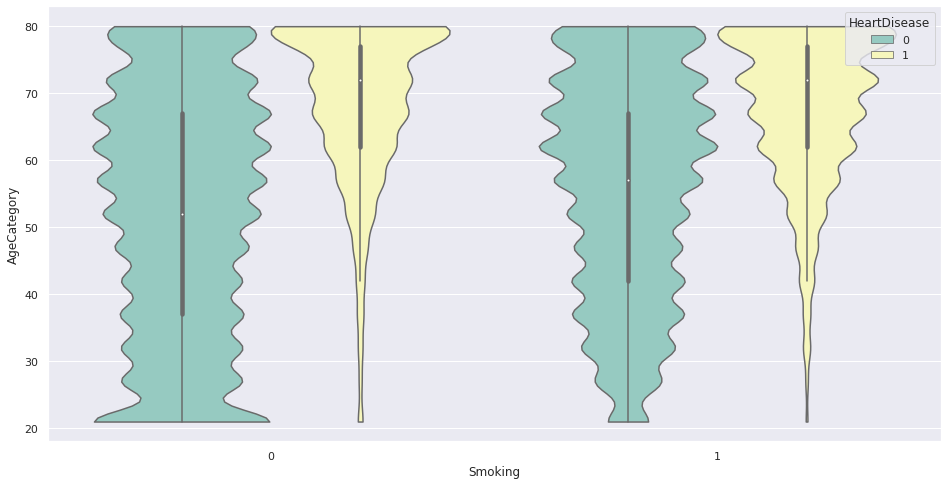

In [15]:
df_smoke= df_heart[['Smoking','AgeCategory','HeartDisease']].replace({'Yes':1, 'No':0})

sns.violinplot(data=df_smoke, x='Smoking', y='AgeCategory', hue='HeartDisease', cut=0, scale="width", palette="Set3")

##### El consumo de alcohól tendrá incidencia acorde al sexo de la persona.

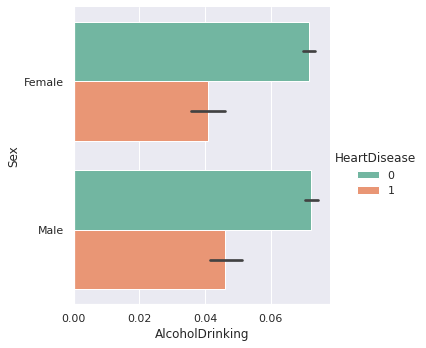

In [14]:
df_drink= df_heart[['AlcoholDrinking','Sex','HeartDisease']].replace({'Yes':1, 'No':0})

sns.catplot(data=df_drink, x='AlcoholDrinking', y='Sex', hue='HeartDisease', kind = 'bar', palette="Set2")

##### La actividad física tambien tendrá incidencia acorde al raza de la persona.

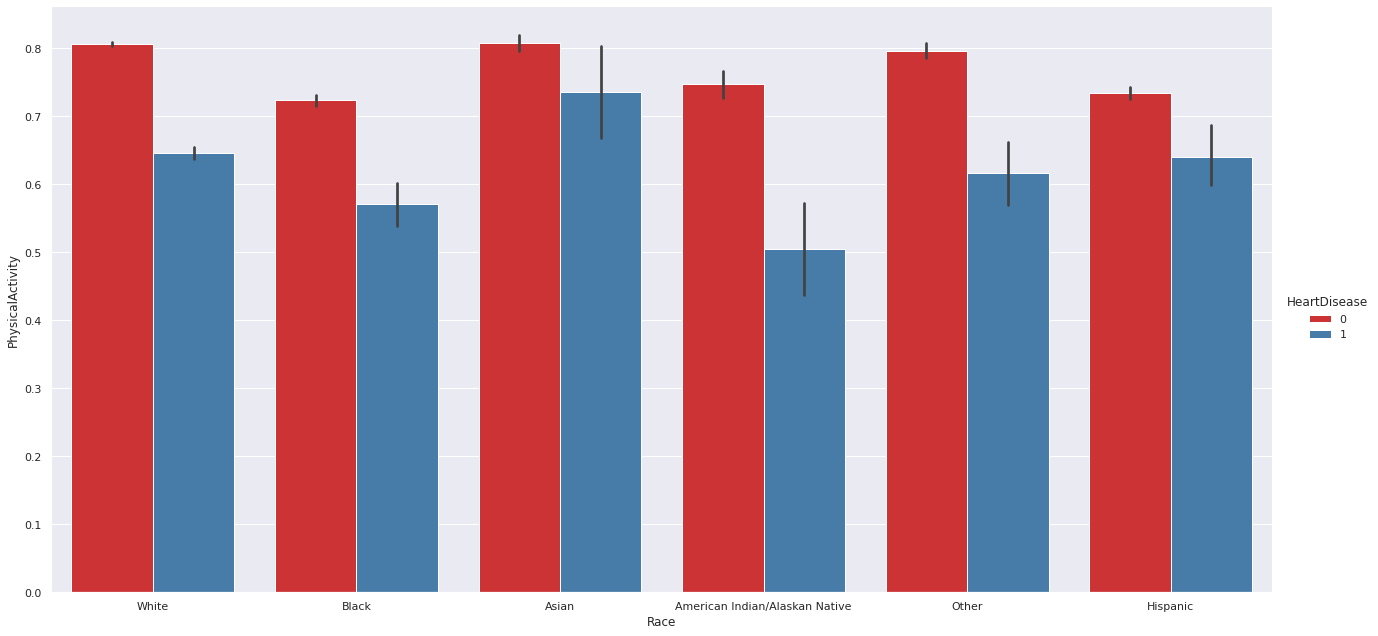

In [13]:
df_PhysicalActivity= df_heart[['PhysicalActivity','Race','HeartDisease']].replace({'Yes':1, 'No':0})

sns.catplot(data=df_PhysicalActivity, y='PhysicalActivity', x='Race', hue='HeartDisease', kind = 'bar', palette="Set1", height=9, aspect=2)